TP555 - AI/ML
Lista de Exercícios #2
Regressão Linear

1. Qual técnica de regressão linear você usaria se tivesse um conjunto de treinamento com milhares de features? Explique por quais razões você utilizaria esta técnica.
R: Iterativamente através do gradiente descendente, ele ajusta os parâmetros iterativamente variação ou decaimento adaptativo, no caso de ter um conjunto com milhares de features não é necessário atualizar manualmente (trabalhoso e demorado), o passo é adaptativamente ajustado de acordo com a performance do modelo além de possuir passos diferentes para cada parâmetro do modelo e atualizá-los independentemente, e quando existe algum parâmetro a ser ajustado o esquema normalmente funciona muito bem para uma grande gama de valores, já a equação normal não é escalonável e consome muita memória.

2. Suponha que as features (i.e., atributos) do seu conjunto de treinamento tenham escalas muito diferentes. Qual técnica de regressão linear pode sofrer com isso e como? O que pode ser feito para mitigar este problema?
R: Gradiente descendente, pois se as features tiverem escalas muito diferentes, os parâmetros de features com escala muito grande vão ser atualizados mais rapidamente do que parâmetros com escala pequena. Pode-se usar o Escalonamento de Features utilizando padronização, pois ele permite que a superfície tenha uma inclinação similiar em todas as direções, ou seja, os atributos ficam com variações similares, com essa superfície o treinamento se torna rápido e o algoritmo converge mais rapidamente, trazendo assim, todos os valores (pesos ou features) para as mesmas magnitudes.

3. Suponha que você use o gradiente descendente em batelada e plote o erro de cada época. Se você perceber que o erro aumenta constantemente, o que provavelmente está acontecendo? Como você pode consertar isso?
R: Pode ter acontecido que o passo de aprendizagem utilizado para o treinamento seja maior do que deveria, com isso ele pode passar o mínimo global, fazendo com que o erro aumente constantemente a cada época. Podemos ajustar o passo de aprendizagem para que seja pequeno o suficiente para convergir corretamente.

4. Entre os algoritmos baseados no gradiente descendente (GD) que discutimos (batch, estocástico e mini-batch), qual deles chega mais rapidamente à vizinhança da solução ótima? Qual deles realmente converge? O que você pode fazer para que os outros também convirjam?
R: O Gradiente Descendente Estocástico e Mini-batch. O Batch. Para o estocástico a solução é reduzir gradualmente a taxa de aprendizagem, para que ele consiga se livrar dos mínimos globais inicialmente (com grandes valores) e depois diminuindo os valores para estabilizar no mínimo global. Para o Mini-batch pode-se usar esquemas de variação do passo de aprendizagem para melhorar a convergência.

5. Em sala de aula, nós discutimos 3 tipos de algoritmos baseados no gradiente descendente (batch, estocástico e mini-batch), porém, o código do mini-batch foi o único que não foi apresentado. Portanto, neste exercício eu peço que vocês:

a. Implementem o algoritmo do mini-batch
b. Testem sua implementação com y = 2*x1 + 2*x2 + w, onde x1, x2 e w são M =1000 valores retirados de uma distribuição aleatória Gaussiana normal padrão(i.e, com média 0 e variância igual a 1) e utilizando a função hipótese h = a1*x1 + a2*x2,c. Plotem a superfície de erro, a superfície de contorno com os parâmetros a1 e a2 para cada iteração do mini-batch, e o gráfico de iteração versus erro,
c. Plotem a superfície de erro, a superfície de contorno com os parâmetros a1 e a2 para cada iteração do mini-batch, e o gráfico de iteração versus erro,

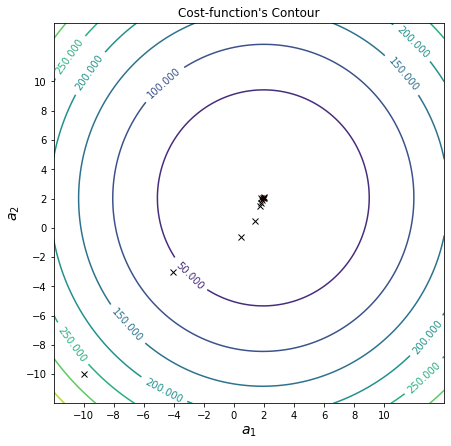

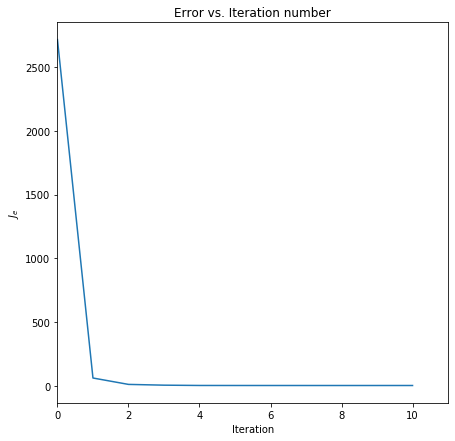

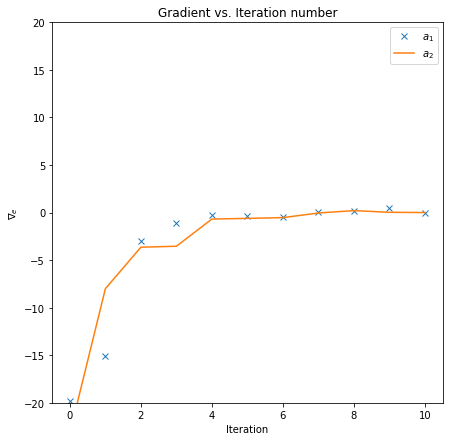

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random

%matplotlib inline

M = 1000

# semente
np.random.seed(20200413)

x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)

y = 2*x1 + 2*x2 + np.random.randn(M, 1)

# Concatenate both column vectors, x1 and x2
X = np.c_[x1, x2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0]*x1 + a_opt[1, 0]*x2
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

# Generate values for parameters.
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat))
        
# Number of epochs
n_epochs = 1
# Constant learning rate
alpha = 0.3

# Mini-batch size.
minibatch_size = 100

# Random initialization of parameters
a = np.random.randn(2,1)
a[0] = -10
a[1] = -10

# Create vector for parameter history
a_hist = np.zeros((2, n_epochs*M+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create vector to store eta history
alpha_hist = np.zeros((n_epochs*M))

# Create array for storing error values
Jgd = np.zeros(n_epochs*M+1)

Jgd[0] = (1/minibatch_size)*sum(np.power(y - X.dot(a), 2))

grad_hist = np.zeros((2, n_epochs*M))
  
inc = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(M)
    X_b_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, M, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = -2/minibatch_size * xi.T.dot(yi - xi.dot(a))
        grad_hist[0, epoch*M+inc] = gradients[0]
        grad_hist[1, epoch*M+inc] = gradients[1]
        a = a - alpha * gradients
        a_hist[0, epoch*M+inc+1] = a[0]
        a_hist[1, epoch*M+inc+1] = a[1]
        Jgd[epoch*M+inc+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
        inc = inc + 1
        
# Plot contour figure        
fig = plt.figure(figsize=(7,7))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='red', marker='*')
plt.plot(a_hist[0, 0:inc+1], a_hist[1, 0:inc+1], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

fig = plt.figure(figsize=(7,7))

plt.plot(np.arange(0, inc+1), Jgd[0:inc+1])
plt.xlim((0, inc+1))
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

fig = plt.figure(figsize=(7,7))

plt.plot(np.arange(0, inc+1), grad_hist[0,0:inc+1], 'x', label='$a_1$')
plt.plot(np.arange(0, inc+1), grad_hist[1,0:inc+1], label='$a_2$')
plt.ylim([-20, 20])
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.show()

d. Encontrem o valor ótimo do passo de aprendizagem ( Dica: utilizem os gráficos da superfície de contorno com os parâmetros a1 e a2 para cada iteração do mini-batch e o gráfico de iteração versus erro para saber se aquele passo é o ótimo. Acessem os links abaixo para entender como vocês podem plotar os gráficos de contorno.),
■ https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py
■ https://www.python-course.eu/matplotlib_contour_plot.php
e. Comparem os resultados do mini-batch com os resultados obtidos com o GD embatelada (batch) e GD estocástico ( Dica : para a comparação, usem os códigos que estão nos slides da aula e plotem os gráficos da superfície de contorno com os parâmetros a1 e a2 para cada iteração e o gráfico de iteração versus o erro para GD em batelada e estocástico).

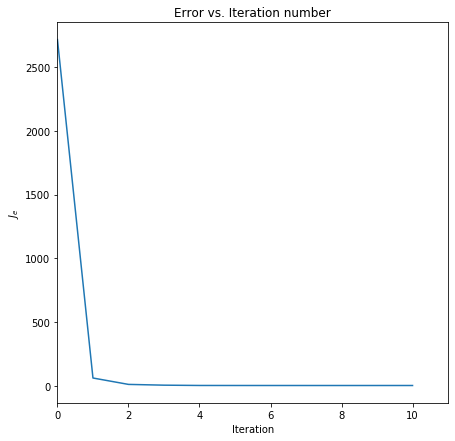

a0: 1.9596
a1: 2.0428


In [116]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random

%matplotlib inline

M = 1000

# semente
np.random.seed(20200413)

x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)

y = 2*x1 + 2*x2 + np.random.randn(M, 1)

# Concatenate both column vectors, x1 and x2
X = np.c_[x1, x2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0]*x1 + a_opt[1, 0]*x2
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

# Generate values for parameters.
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat))
        
# Number of epochs
n_epochs = 1
# Constant learning rate
alpha = 0.3

# Mini-batch size.
minibatch_size = 100

# Random initialization of parameters
a = np.random.randn(2,1)
a[0] = -10
a[1] = -10

# Create vector for parameter history
a_hist = np.zeros((2, n_epochs*M+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create vector to store eta history
alpha_hist = np.zeros((n_epochs*M))

# Create array for storing error values
Jgd = np.zeros(n_epochs*M+1)

Jgd[0] = (1/minibatch_size)*sum(np.power(y - X.dot(a), 2))

grad_hist = np.zeros((2, n_epochs*M))
  
inc = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(M)
    X_b_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, M, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = -2/minibatch_size * xi.T.dot(yi - xi.dot(a))
        grad_hist[0, epoch*M+inc] = gradients[0]
        grad_hist[1, epoch*M+inc] = gradients[1]
        a = a - alpha * gradients
        a_hist[0, epoch*M+inc+1] = a[0]
        a_hist[1, epoch*M+inc+1] = a[1]
        Jgd[epoch*M+inc+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
        inc = inc + 1

fig = plt.figure(figsize=(7,7))

plt.plot(np.arange(0, inc+1), Jgd[0:inc+1])
plt.xlim((0, inc+1))
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

print('a0: %1.4f' % (a_opt[0][0]))
print('a1: %1.4f' % (a_opt[1][0]))

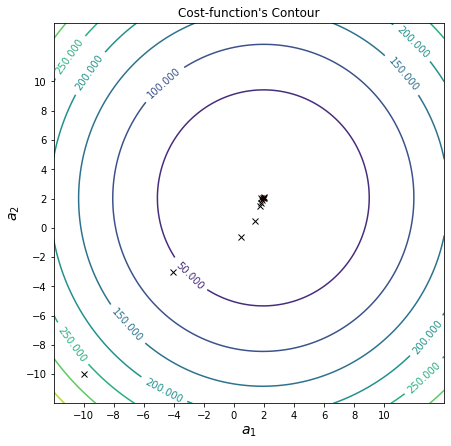

a0: 1.9596
a1: 2.0428


In [133]:
import numpy as np
# Define the number of examples.

M = 1000
np.random.seed(20200413)
# Generate target function.
x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)
y = 2*x1 + 2*x2 + np.random.randn(M, 1)
# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]
# Constant learning rate.
eta = 0.1
# Number of iterations.
n_iterations = 1000
# Random initialization.
a = np.random.randn(2,1)

# Batch gradient-descent loop.
for iteration in range(n_iterations):
    gradients = -2/M * X.T.dot(y - X.dot(a))
    a = a - eta * gradients
    
# Generate points for plotting the cost-function surface
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat))    

# Plot contour figure        
fig = plt.figure(figsize=(7,7))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:inc+1], a_hist[1, 0:inc+1], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

print('a0: %1.4f' % (a[0][0]))
print('a1: %1.4f' % (a[1][0]))

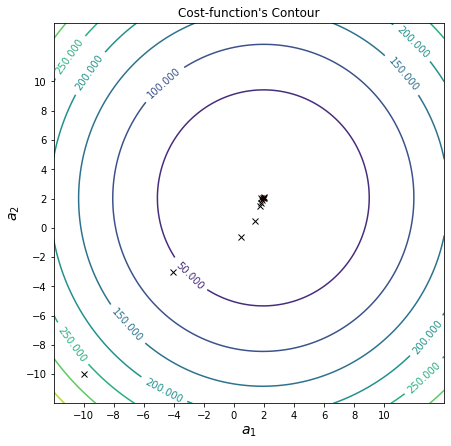

a0: 1.6898
a1: 2.0296


In [134]:
import numpy as np
import random

# Define the number of examples.
M = 1000
np.random.seed(20200413)
# Generate target function.
x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)
y = 2*x1 + 2*x2 + np.random.randn(M, 1)
# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]
# Number of epochs.
n_epochs = 1
# Constant learning rate.
alpha = 0.1
# Random initialization of parameters.
a = np.random.randn(2,1)

# Stocastic gradient-descent loop.
for epoch in range(n_epochs):
    for i in range(M):
        random_index = np.random.randint(M)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = -2*xi.T.dot(yi - xi.dot(a))
        a = a - alpha * gradients

# Generate points for plotting the cost-function surface
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat))        
        
# Plot contour figure        
fig = plt.figure(figsize=(7,7))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:inc+1], a_hist[1, 0:inc+1], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

print('a0: %1.4f' % (a[0][0]))
print('a1: %1.4f' % (a[1][0]))

f. Baseando-se nos gráficos do item anterior, a que conclusões vocês podem chegar quanto ao treinamento dos 3 tipos de gradiente descendente?
• Todos se aproximam do mínimo, mas o batch caminha diretamente em linha reta para lá.
• Enquanto SGD e o mini-batch continuam a caminhar ao redor do mínimo.
• O progresso do mini-batch é menos irregular do que com o SGD, mas depende do tamanho do mini-batch.
• O batch leva muito tempo para executar cada época enquanto SGD e mini-batch também alcançariam o mínimo caso uma boa estratégia para ajuste do passo de aprendizagem fosse usada.

6. Dada a seguinte função hipótese e assumindo o erro quadrático médio como função de erro h = a0 + a1*x + a2*x^2. Encontre as equações de atualização dos pesos/parâmetros para esta função. Em seguida, utilizando os vetores x e y definidos abaixo, encontre os parâmetros a0, a1 e a2 através do método da regressão de forma fechada e com gradiente descendente em batelada. y = 3 + 1.5*x + 2.3*x^2 + w, onde x é um vetor coluna com M = 1000 valores retirados de uma distribuição aleatória uniformemente distribuída no intervalo de -5 a 5 e w é outro vetor coluna com M valores retirados de uma distribuição aleatória Gaussiana com média 0 e variância igual a 10.

a. Plote o gráfico do número de iterações versus o erro.
b. Baseado no gráfico acima, encontre o melhor valor para o passo deaprendizagem.

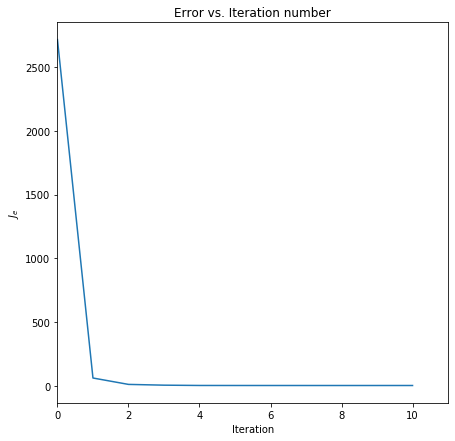

a0: 1.3694
a1: -1.8623


In [141]:
import numpy as np
# Define the number of examples.

M = 1000
np.random.seed(20200413)
# Generate target function.
x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)
w = np.random.normal(0,10,M)
y = 3 + (1.5*x1) + (2.3*x2*x2) + w

# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]
# Constant learning rate.
eta = 0.1
# Number of iterations.
n_iterations = 1000
# Random initialization.
a = np.random.randn(2,1)

# Batch gradient-descent loop.
for iteration in range(n_iterations):
    gradients = -2/M * X.T.dot(y - X.dot(a))
    a = a - eta * gradients
    
fig = plt.figure(figsize=(7,7))

plt.plot(np.arange(0, inc+1), Jgd[0:inc+1])
plt.xlim((0, inc+1))
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

print('a0: %1.4f' % (a[0][0]))
print('a1: %1.4f' % (a[1][0]))

7. Neste exercício você vai utilizar o arquivo training.csv onde a primeira coluna são os valores de x (feature) e a segunda de y (label). Baixe o arquivo do endereço:
training.csv . Após, leia o conteúdo do arquivo, ou seja, os vetores x e y, com os seguintes comandos:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('training.csv', header=None)
x = df[0].to_numpy()
y = df[1].to_numpy()
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, 'b.')

Em seguida, utilize o algoritmo do gradiente descendente em batelada para encontrar os parâmetros de cada uma das seguintes funções hipóteses.

a. h = a0 + a1*x
b. h = a0 + a1*x + a2*x^2
c. h = a0 + a1*x + a2*x^2 + a3*x^3
d. h = a0 + a1*x + a2*x^2 + a3*x^3 + a4*x^4

Para cada uma das funções hipótese acima faça o seguinte:
a. Encontre os valores ótimos dos parâmetros através do método de forma fechada, i.e., equação normal, ou também conhecida como método dos mínimos quadrados.
b. Encontre as equações de atualização dos parâmetros assumindo o erro quadrático médio como função de erro.
c. Encontre o valor ótimo do passo de aprendizagem.
d. Plote um gráfico que mostre x vs. y e x vs. h, ou seja, um gráfico comparando os
dados originais com a estimativa (i.e., hipótese) da função que gerou y.
e. Plote um gráfico com do número de iterações versus o erro.

In [69]:
## Target function.
## Generate a synthetic dataset from a quadratic function
M = 1000;

# Generate random x values between -5 and 5
x = 10*( rand(M, 1) - 0.5  );

# Define the function and the true parameters
# y = a_0 + a_1*x + a_2*x^2
a_0 = 1;
a_1 = -2;
a_2 = 0.5;

# Define target
y = a_0 + a_1*x + a_2*x.^2

# Add some noise
y = y + 0.5*randn(M, 1);

figure;
plot(x, y, '.');

rng(12041981)
xt = 10*( rand(M, 1) - 0.5  );

# Define the function and the true parameters
# y = a_0 + a_1*x + a_2*x^2
a_0 = 1;
a_1 = -2;
a_2 = 0.5;

# Define target
yt = a_0 + a_1*xt + a_2*xt.^2;

# Add some noise
yt = yt + 0.5*randn(M, 1);

if(1)
    ## Closed-form solution.
    X = [ones(M, 1) x x.^2 x.^3 x.^4];
    
    a_opt = pinv(X.'*X)*X.'*y;
    
    yhat = a_opt(1) + a_opt(2)*x + a_opt(3)*x.^2 + a_opt(4)*x.^3 + a_opt(5)*x.^4;
    
    Joptimum = (1/M)*sum((y - yhat).^2);
    
    figure;
    plot(x, yhat, '.');
    
    ## Gradient-descent solution (Hyphothesis #1).
    alpha = 0.00002;
    
    # Initialize 'a' at a random location within the parameter's space.
    a(:,1) = [3;-4;2;4;5];
    
    yhat = a(1,1) + a(2,1)*x + a(3,1)*x.^2 + a(4,1)*x.^3 + a(5,1)*x.^4;
    
    Jgd(1) = (1/M)*sum((y - yhat).^2);
    
    error = 1;
    iter = 1;
    while(error > 0.001 && iter <= 100000)
        
        h = a(1,iter) + a(2,iter)*x + a(3,iter)*x.^2 + a(4,iter)*x.^3 + a(5,iter)*x.^4;
        
        update = -(2./M).*(y - h).'*X;
        
        a(:,iter+1) = a(:,iter) - alpha.*update.';
        
        yhat = a(1,iter+1) + a(2,iter+1)*x + a(3,iter+1)*x.^2 + a(4,iter+1)*x.^3 + a(5,iter+1)*x.^4;
        
        Jgd(iter+1) = (1/M).*sum((y - yhat).^2);
        
        error = abs(Jgd(iter)-Jgd(iter+1));
        
        iter = iter + 1;
        
    end
    
    figure;
    semilogy(1:iter,Jgd)
    
    figure;
    yhat = a(1,iter) + a(2,iter)*x + a(3,iter)*x.^2 + a(4,iter)*x.^3 + a(5,iter)*x.^4;
    plot(x, yhat, '.')
    
    fprintf(1,'----------------------------------------------------------\n')
    fprintf(1, 'Hyphothesis #1 (5 parameters) - J_e training: #1.2e\n', Jgd(iter));
    yhatt = a(1,iter) + a(2,iter)*xt + a(3,iter)*xt.^2 + a(4,iter)*xt.^3 + a(5,iter)*xt.^4;
    Joptimum = (1/M)*sum((yt - yhatt).^2);
    fprintf(1, 'Hyphothesis #1 (5 parameters) - J_e test: #1.2e\n', Joptimum);  
end

if(1)
    ## Closed-form solution.
    X = [ones(M, 1) x x.^2 x.^3];
    
    a_opt = pinv(X.'*X)*X.'*y;
    
    yhat = a_opt(1) + a_opt(2)*x + a_opt(3)*x.^2 + a_opt(4)*x.^3;
    
    Joptimum = (1/M)*sum((y - yhat).^2);
    
    figure;
    plot(x, yhat, '.');
   
    ## Gradient-descent solution (Hyphothesis #2).
    alpha = 0.0004;
    
    # Initialize 'a' at a random location within the parameter's space.
    clear a Jgd
    a(:,1) = [3;-4;2;4];
    
    yhat = a(1,1) + a(2,1)*x + a(3,1)*x.^2 + a(4,1)*x.^3;
    
    Jgd(1) = (1/M)*sum((y - yhat).^2);
    
    error = 1;
    iter = 1;
    while(error > 0.001 && iter <= 100000)
        
        h = a(1,iter) + a(2,iter)*x + a(3,iter)*x.^2 + a(4,iter)*x.^3;
        
        update = -(2./M).*(y - h).'*X;
        
        a(:,iter+1) = a(:,iter) - alpha.*update.';
        
        yhat = a(1,iter+1) + a(2,iter+1)*x + a(3,iter+1)*x.^2 + a(4,iter+1)*x.^3;
        
        Jgd(iter+1) = (1/M).*sum((y - yhat).^2);
        
        error = abs(Jgd(iter)-Jgd(iter+1));
        
        iter = iter + 1;
        
    end
    
    figure;
    semilogy(1:iter,Jgd)
    
    figure;
    yhat = a(1,iter) + a(2,iter)*x + a(3,iter)*x.^2 + a(4,iter)*x.^3;
    plot(x, yhat, '.')
    
    fprintf(1,'----------------------------------------------------------\n')
    fprintf(1, 'Hyphothesis #2 (4 parameters) - J_e training: #1.2e\n', Jgd(iter));
    yhatt = a(1,iter) + a(2,iter)*xt + a(3,iter)*xt.^2+ a(4,iter)*xt.^3;
    Joptimum = (1/M)*sum((yt - yhatt).^2);
    fprintf(1, 'Hyphothesis #2 (4 parameters) - J_e test: #1.2e\n', Joptimum);
    
end

if(1)
    ## Closed-form solution.
    X = [ones(M, 1) x x.^2];
    
    a_opt = pinv(X.'*X)*X.'*y;
    
    yhat = a_opt(1) + a_opt(2)*x + a_opt(3)*x.^2;
    
    Joptimum = (1/M)*sum((y - yhat).^2);
    
    figure;
    plot(x, yhat, '.');
   
    ## Gradient-descent solution (Hyphothesis #1).
    alpha = 0.007;
    
    # Initialize 'a' at a random location within the parameter's space.
    clear a Jgd
    a(:,1) = [3;-4;2];
    
    yhat = a(1,1) + a(2,1)*x + a(3,1)*x.^2;
    
    Jgd(1) = (1/M)*sum((y - yhat).^2);
    
    error = 1;
    iter = 1;
    while(error > 0.001 && iter <= 100000)
        
        h = a(1,iter) + a(2,iter)*x + a(3,iter)*x.^2;
        
        update = -(2./M).*(y - h).'*X;
        
        a(:,iter+1) = a(:,iter) - alpha.*update.';
        
        yhat = a(1,iter+1) + a(2,iter+1)*x + a(3,iter+1)*x.^2;
        
        Jgd(iter+1) = (1/M).*sum((y - yhat).^2);
        
        error = abs(Jgd(iter)-Jgd(iter+1));
        
        iter = iter + 1;
        
    end
    
    figure;
    semilogy(1:iter,Jgd)
    
    figure;
    yhat = a(1,iter) + a(2,iter)*x + a(3,iter)*x.^2;
    plot(x, yhat, '.')
    
    fprintf(1,'----------------------------------------------------------\n')
    fprintf(1, 'Hyphothesis #3 (3 parameters) - J_e training: #1.2e\n', Jgd(iter));
    yhatt = a(1,iter) + a(2,iter)*xt + a(3,iter)*xt.^2;
    Joptimum = (1/M)*sum((yt - yhatt).^2);
    fprintf(1, 'Hyphothesis #3 (3 parameters) - J_e test: #1.2e\n', Joptimum);
     
end

if(1)
    ## Closed-form solution.
    X = [ones(M, 1) x];
    
    a_opt = pinv(X.'*X)*X.'*y;
    
    yhat = a_opt(1) + a_opt(2)*x;
    
    Joptimum = (1/M)*sum((y - yhat).^2);
    
    figure;
    plot(x, yhat, '.');
   
    ## Gradient-descent solution (Hyphothesis #1).
    alpha = 0.1;
    
    # Initialize 'a' at a random location within the parameter's space.
    clear a Jgd
    a(:,1) = [3;-4];
    
    yhat = a(1,1) + a(2,1)*x;
    
    Jgd(1) = (1/M)*sum((y - yhat).^2);
    
    error = 1;
    iter = 1;
    while(error > 0.001 && iter <= 100000)
        
        h = a(1,iter) + a(2,iter)*x;
        
        update = -(2./M).*(y - h).'*X;
        
        a(:,iter+1) = a(:,iter) - alpha.*update.';
        
        yhat = a(1,iter+1) + a(2,iter+1)*x;
        
        Jgd(iter+1) = (1/M).*sum((y - yhat).^2);
        
        error = abs(Jgd(iter)-Jgd(iter+1));
        
        iter = iter + 1;
                 
    end
    
    figure;
    semilogy(1:iter,Jgd)
    
    figure;
    yhat = a(1,iter) + a(2,iter)*x;
    plot(x, yhat, '.')
    
    fprintf(1,'----------------------------------------------------------\n')
    fprintf(1, 'Hyphothesis #4 (2 parameters) - J_e training: #1.2e\n', Jgd(iter));
    yhatt = a(1,iter) + a(2,iter)*xt;
    Joptimum = (1/M)*sum((yt - yhatt).^2);
    fprintf(1, 'Hyphothesis #4 (2 parameters) - J_e testing: #1.2e\n', Joptimum);
    
end

SyntaxError: invalid syntax (<ipython-input-69-32171f8a1599>, line 33)

8. Neste exercício você irá aplicar escalonamento de features aos dados de treinamento e teste. Dada a seguinte função objetivo
y = x1 + x2, onde x1 é um vetor coluna com M amostras retiradas de uma distribuição Gaussiana com média 0 e desvio padrão unitário e x2 é um vetor coluna com M amostras retiradas
de uma distribuição Gaussiana com média 10 e desvio padrão igual a 10. Gere dois conjuntos de dados, com M = 1000 amostras cada. Um conjunto será utilizado para
treinamento e o outro para teste, ou seja, validação do modelo treinado. Utilize o gradiente descendente em batelada com a seguinte função hipótese h = a1*x1 + a2*x2, com a1 e a2 iniciais iguais a -20 e -20, respectivamente. Para todos os casos abaixo, treine os modelos com o mesmo número máximo de iterações, por exemplo, 2000 iterações e um critério de parada que faça o algoritmo parar quando o erro entre duas épocas consecutivas for menor do que 0.001, ou seja, o algoritmo irá parar se o erro for menor do 0.001 ou se atingir o número máximo de iterações. Pede-se:
a. Sem aplicar nenhum escalonamento de features aos exemplos de treinamento, plote a superfície de erro, a superfície de contorno com os parâmetros a1 e a2 encontrados durante as iterações (ou seja, o histórico de valores que o algoritmo encontra durante o treinamento do modelo) e o gráfico de erro quadrático médio versus o número de iterações para os conjuntos de treinamento e teste. OBS.1: Não se esqueça de encontrar o valor ótimo para o passo de aprendizagem. OBS.2: Não se esqueça de encontrar o valor ótimo dos pesos/parâmetros e
plotá-los no gráfico de contorno com o histórico dos pesos.
b. Aplique a normalização min-máx às features de treinamento e teste, plote a superfície de erro, a superfície de contorno com os parâmetros a1 e a2 encontrados durante as iterações e o gráfico de erro quadrático médio versus o número de iterações para os conjuntos de treinamento e teste. OBS.1 : Não se esqueça de encontrar o valor ótimo para o passo de aprendizagem. OBS.2 : Não se esqueça que o conjunto de testes é normalizado com os valores mín-máx encontrados para o conjunto de treinamento. OBS.3: Não se esqueça de encontrar o valor ótimo dos pesos/parâmetros e plotá-los no gráfico de contorno com o histórico dos pesos.
c. Aplique a padronização às features de treinamento e teste, plote a superfície de erro, a superfície de contorno com os parâmetros a1 e a2 encontrados durante as iterações e o gráfico de erro quadrático médio versus o número de iterações para os conjuntos de treinamento e teste. OBS.1: Não se esqueça de encontrar o valor ótimo para o passo de aprendizagem. OBS.2 : Não se esqueça que o conjunto de testes é padronizado com os valores de padronização encontrados para o conjunto de treinamento. OBS.3: Não se esqueça de encontrar o valor ótimo dos pesos/parâmetros e plotá-los no gráfico de contorno com o histórico dos pesos.
d. Repita os itens b e c aplicando desta vez a normalização min-máx e a padronização, respectivamente, também aos targets/rótulos (ou seja, os valoresde y).
e. Baseado nos resultados anteriores o que você pode concluir a respeito do escalonamento de features? (D ica : Comente a respeito das formas das superfícies de erro, dos números de iterações necessárias para se alcançar o ponto ótimo, isso se ele é alcançado, da diferença entre o erro quadrático médio obtido para o conjunto de treinamento e o obtido para o conjunto de testes (são similares ou diferentes), da diferença entre os valores do erro quadrático médio para os 3 casos acima, i.e., sem escalonamento e com os 2 tipos de escalonamento com e sem escalonamento dos labels (qual resulta no menor erro? Escalonar os labels traz algum benefício? Como ficam as superfícies de erro quando se escalona os labels?), e o que mais você achar interessante comentar. Quanto mais detalhada sua análise dos resultados, melhor será sua avaliação neste exercício.)


In [142]:
rng(20200413);

fontSize = 14;

% Initial parameters.
a_int = [-400;-400];

M = 100000;

% Training set.
x1t = randn(M, 1);

x2t = 100*randn(M, 1) + 100;

yt = x1t + x2t;

% Prediction set.
rng(12041988);

Mp = M/10;
x1p = randn(Mp, 1);

x2p = 100*randn(Mp, 1) + 100;

yp = x1p + x2p;

% Parameter space.
a1 = -444:20:448;

a2 = -444:20:448;

[A1,A2] = meshgrid(a1,a2);

non_scaled = 1;
standardization = 1;
minmaxscaling = 1;

target_standardization = 1;
target_minmaxscaling = 1;


if(non_scaled==1)
    clear a Jgd x1 x2 y x1pp x2pp ypp Jgdpp
    
    x1 = x1t;
    x2 = x2t;
    y = yt;
    
    J = zeros(length(A1),length(A2));
    for iter1=1:1:length(a1) 
        for iter2=1:1:length(a2)
            yhat = A1(iter1, iter2)*x1 + A2(iter1, iter2)*x2;           
            J(iter1, iter2) = (1/length(y)).*sum((y - yhat).^2);
        end
    end
    
    figure1 = figure('rend','painters','pos',[10 10 800 700]);
    surf(A1, A2, J)
    xlabel('a_1', 'FontSize', fontSize)
    ylabel('a_2', 'FontSize', fontSize)
    zlabel('J_e', 'FontSize', fontSize)
    title('Superficie de Erro', 'FontSize', fontSize)
    
    %% Closed-form solution.
    
    X = [x1 x2];
    
    a_opt_noscale = pinv(X.'*X)*X.'*y;
    
    yhat = a_opt_noscale(1)*x1 + a_opt_noscale(2)*x2;
    
    Joptimum = (1/M)*sum((y - yhat).^2);
    
    %% Gradient-descent solution.
    alpha = 0.00002;
    
    % Initialize 'a' at a random location within the parameter's space.
    a(:,1) = a_int;
    
    yhat = a(1,1)*x1 + a(2,1)*x2;
    
    Jgd(1) = (1/M)*sum((y - yhat).^2);
    
    yhatp = a(1,1)*x1p + a(2,1)*x2p;
    
    Jgdpp(1) = (1/Mp).*sum((yp - yhatp).^2);
    
    error = 1;
    iter = 1;
    while(error > 0.001 && iter <= 10000)
        
        h = a(1,iter)*x1 + a(2,iter)*x2;
        
        update = -(2./M).*(y - h).'*X;
        
        a(:,iter+1) = a(:,iter) - alpha.*update.';
        
        yhat = a(1,iter+1)*x1 + a(2,iter+1)*x2;
        
        Jgd(iter+1) = (1/M).*sum((y - yhat).^2);
        
        yhatp = a(1,iter+1)*x1p + a(2,iter+1)*x2p;
        
        Jgdpp(iter+1) = (1/Mp).*sum((yp - yhatp).^2);
        
        error = abs(Jgd(iter)-Jgd(iter+1));
        
        iter = iter + 1;
        
    end
    
    a_noscale = a(:, iter);
    
    figure2 = figure('rend','painters','pos',[10 10 800 700]);
    subplot(2,1,1);
    contour(A1, A2, J, 'ShowText','on')
    xlabel('a_1', 'FontSize', fontSize)
    ylabel('a_2', 'FontSize', fontSize)
    zlabel('J_e', 'FontSize', fontSize)
    title('Contorno da Superficie de Erro', 'FontSize', fontSize, 'Interpreter', 'latex')
    hold on
    plot(a_opt_noscale(1), a_opt_noscale(2), 'r*', 'MarkerSize', 10, 'LineWidth',1);
    plot(a(1,:), a(2,:), 'kx', 'MarkerSize', 10, 'LineWidth',1);
    hold off;
    
    subplot(2,1,2);
    semilogy(0:1:iter-1, Jgd, 'LineWidth',1)
    hold on
    semilogy(0:250:iter-1, Jgdpp(1:250:end), 'x', 'LineWidth',1)
    xlabel('Iteracao', 'FontSize', fontSize)
    ylabel('J_e', 'FontSize', fontSize)
    strTitle = sprintf('Iteracoes vs. Erro - $\\alpha = %1.0e$', alpha);
    title(strTitle, 'FontSize', fontSize, 'Interpreter', 'latex')
    lgd = legend('Erro de Treinamento','Erro de Teste');
    lgd.FontSize = 14;
    xlim([0 iter-1])
    grid on
    hold off
end

if(standardization==1)
    clear a Jgd x1 x2 y x1pp x2pp ypp Jgdpp
    
    x1 = x1t;
    x2 = x2t;
    y = yt;
    
    x1_mean = mean(x1);
    x1_std = std(x1);
    x1 = (x1 - x1_mean) ./ (x1_std);
    
    x2_mean = mean(x2);
    x2_std = std(x2);
    x2 = (x2 - x2_mean) ./ (x2_std);
    
    if(target_standardization==1)
        y_mean = mean(y);
        y_std = std(y);
        y = (y - y_mean) ./ (y_std);
    end
    
    x1pp = (x1p - x1_mean) ./ x1_std;
    x2pp = (x2p - x2_mean) ./ x2_std;
    if(target_standardization==1)
        ypp = (yp - y_mean) ./ (y_std);
    else
        ypp = yp;
    end
    
    J = zeros(length(A1),length(A2));
    for iter1=1:1:length(a1)
        
        for iter2=1:1:length(a2)
            
            yhat = A1(iter1, iter2)*x1 + A2(iter1, iter2)*x2;
            
            J(iter1, iter2) = (1/length(y)).*sum((y - yhat).^2);
            
        end
        
    end
    
    figure1 = figure('rend','painters','pos',[10 10 800 700]);
    surf(A1, A2, J)
    xlabel('a_1', 'FontSize', fontSize)
    ylabel('a_2', 'FontSize', fontSize)
    zlabel('J_e', 'FontSize', fontSize)
    title('Superficie de Erro', 'FontSize', fontSize)
    
    %% Closed-form solution.
    
    X = [x1 x2];
    
    a_opt_std = pinv(X.'*X)*X.'*y;
    
    yhat = a_opt_std(1)*x1 + a_opt_std(2)*x2;
    
    Joptimum = (1/M)*sum((y - yhat).^2);
    
    %% Gradient-descent solution.
    alpha = 0.5;
    
    % Initialize 'a' at a random location within the parameter's space.
    a(:,1) = a_int;
    
    yhat = a(1,1)*x1 + a(2,1)*x2;
    
    Jgd(1) = (1/M)*sum((y - yhat).^2);
    
    yhatp = a(1,1)*x1pp + a(2,1)*x2pp;
    
    Jgdpp(1) = (1/Mp).*sum((ypp - yhatp).^2);
    
    error = 1;
    iter = 1;
    while(error > 0.001 && iter <= 10000)
        
        h = a(1,iter)*x1 + a(2,iter)*x2;
        
        update = -(2./M).*(y - h).'*X;
        
        a(:,iter+1) = a(:,iter) - alpha.*update.';
        
        yhat = a(1,iter+1)*x1 + a(2,iter+1)*x2;
        
        Jgd(iter+1) = (1/M).*sum((y - yhat).^2);
        
        yhatp = a(1,iter+1)*x1pp + a(2,iter+1)*x2pp;
        
        Jgdpp(iter+1) = (1/Mp).*sum((ypp - yhatp).^2);
        
        error = abs(Jgd(iter)-Jgd(iter+1));
        
        iter = iter + 1;
        
    end
    
    a_std = a(:, iter);
    
    figure2 = figure('rend','painters','pos',[10 10 800 700]);
    subplot(2,1,1);
    contour(A1, A2, J, 'ShowText','on')
    xlabel('a_1', 'FontSize', fontSize)
    ylabel('a_2', 'FontSize', fontSize)
    zlabel('J_e', 'FontSize', fontSize)
    title('Contorno da Superficie de Erro', 'FontSize', fontSize, 'Interpreter', 'latex')
    hold on
    plot(a_opt_std(1), a_opt_std(2), 'r*', 'MarkerSize', 10, 'LineWidth',1);
    plot(a(1,:), a(2,:), 'kx', 'MarkerSize', 10, 'LineWidth',1);
    hold off;

    subplot(2,1,2);
    semilogy(0:1:iter-1, Jgd, 'LineWidth',1)
    hold on
    semilogy(0:1:iter-1, Jgdpp(1:1:end), 'x', 'LineWidth',1)
    xlabel('Iteracao', 'FontSize', fontSize)
    ylabel('J_e', 'FontSize', fontSize)
    strTitle = sprintf('Iteracoes vs. Erro - $\\alpha = %1.0e$', alpha);
    title(strTitle, 'FontSize', fontSize, 'Interpreter', 'latex')
    lgd = legend('Erro de Treinamento','Erro de Teste');
    lgd.FontSize = 14;
    xlim([0 iter-1])
    grid on
    hold off    
end

if(minmaxscaling==1)
    clear a Jgd x1 x2 y x1pp x2pp ypp Jgdpp
    
    x1 = x1t;
    x2 = x2t;
    y = yt;
    
    x1_min = min(x1);
    x1_max = max(x1);
    x1 = (x1 - x1_min) ./ (x1_max - x1_min);
    
    x2_min = min(x2);
    x2_max = max(x2);
    x2 = (x2 - x2_min) ./ (x2_max - x2_min);
    
    if(target_minmaxscaling==1)
        y_min = min(y);
        y_max = max(y);
        y = (y - y_min) ./ (y_max - y_min);
    end
    
    x1pp = (x1p - x1_min) ./ (x1_max - x1_min);
    x2pp = (x2p - x2_min) ./ (x2_max - x2_min);
    if(target_minmaxscaling==1)
        ypp = (yp - y_min) ./ (y_max - y_min);
    else
        ypp = yp;
    end
    
    J = zeros(length(A1),length(A2));
    for iter1=1:1:length(a1)
        
        for iter2=1:1:length(a2)
            
            yhat = A1(iter1, iter2)*x1 + A2(iter1, iter2)*x2;
            
            J(iter1, iter2) = (1/length(y)).*sum((y - yhat).^2);
            
        end
        
    end
    
    figure1 = figure('rend','painters','pos',[10 10 800 700]);
    surf(A1, A2, J)
    xlabel('a_1', 'FontSize', fontSize)
    ylabel('a_2', 'FontSize', fontSize)
    zlabel('J_e', 'FontSize', fontSize)
    title('Superficie de Erro', 'FontSize', fontSize)
    
    %% Closed-form solution.
    
    X = [x1 x2];
    
    a_opt_minmax = pinv(X.'*X)*X.'*y;
    
    yhat = a_opt_minmax(1)*x1 + a_opt_minmax(2)*x2;
    
    Joptimum = (1/M)*sum((y - yhat).^2);
    
    %% Gradient-descent solution.
    alpha = 0.9;
    % Initialize 'a' at a random location within the parameter's space.
    a(:,1) = a_int;
    
    yhat = a(1,1)*x1 + a(2,1)*x2;
    
    Jgd(1) = (1/M)*sum((y - yhat).^2);
    
    yhatp = a(1,1)*x1pp + a(2,1)*x2pp;
    
    Jgdpp(1) = (1/Mp).*sum((ypp - yhatp).^2);
    
    error = 1;
    iter = 1;
    while(error > 0.001 && iter <= 10000)
        
        h = a(1,iter)*x1 + a(2,iter)*x2;
        
        update = -(2./M).*(y - h).'*X;
        
        a(:,iter+1) = a(:,iter) - alpha.*update.';
        
        yhat = a(1,iter+1)*x1 + a(2,iter+1)*x2;
        
        Jgd(iter+1) = (1/M).*sum((y - yhat).^2);
        
        yhatp = a(1,iter+1)*x1pp + a(2,iter+1)*x2pp;
        
        Jgdpp(iter+1) = (1/Mp).*sum((ypp - yhatp).^2);
        
        error = abs(Jgd(iter)-Jgd(iter+1));
        
        iter = iter + 1;
        
    end
    
    a_minmax = a(:, iter);
    
    figure2 = figure('rend','painters','pos',[10 10 800 700]);
    subplot(2,1,1);
    contour(A1, A2, J, 'ShowText','on')
    xlabel('a_1', 'FontSize', fontSize)
    ylabel('a_2', 'FontSize', fontSize)
    zlabel('J_e', 'FontSize', fontSize)
    title('Contorno da Superficie de Erro', 'FontSize', fontSize, 'Interpreter', 'latex')
    hold on
    plot(a_opt_minmax(1), a_opt_minmax(2), 'r*', 'MarkerSize', 10, 'LineWidth',1);
    plot(a(1,:), a(2,:), 'kx', 'MarkerSize', 10, 'LineWidth',1);
    hold off;
    
    subplot(2,1,2);
    semilogy(0:1:iter-1, Jgd, 'LineWidth',1)
    hold on
    semilogy(0:10:iter-1, Jgdpp(1:10:end), 'x', 'LineWidth',1)
    xlabel('Iteracao', 'FontSize', fontSize)
    ylabel('J_e', 'FontSize', fontSize)
    strTitle = sprintf('Iteracoes vs. Erro - $\\alpha = %1.0e$', alpha);
    title(strTitle, 'FontSize', fontSize, 'Interpreter', 'latex')
    lgd = legend('Erro de Treinamento','Erro de Teste');
    lgd.FontSize = 14;
    xlim([0 iter-1])
    grid on
    hold off
end

SyntaxError: invalid syntax (<ipython-input-142-afd1fca90a83>, line 6)